<a href="https://colab.research.google.com/github/acesanu/Mall_Customer_segmentation/blob/main/Mall_Customer_Segmentation_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, rand_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [ ]:
# Reading data
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
# Displaying the first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Shape of the data
df.shape

(200, 5)

In [ ]:
# Checking the null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Checking info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


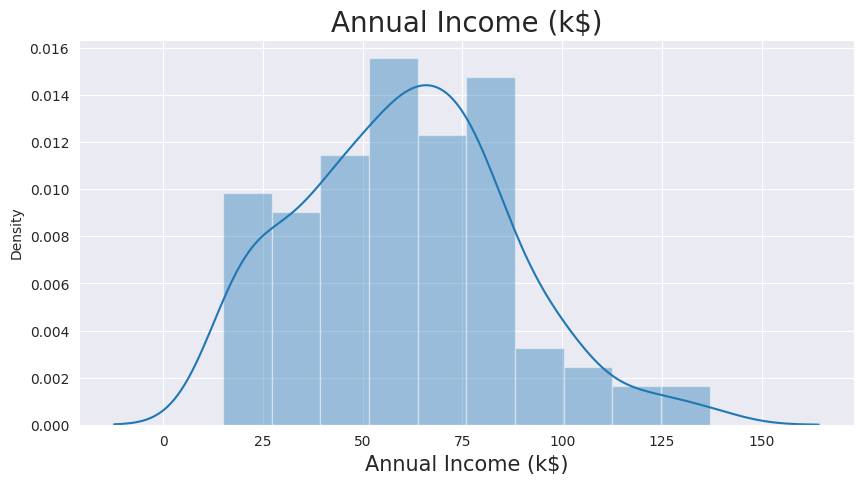

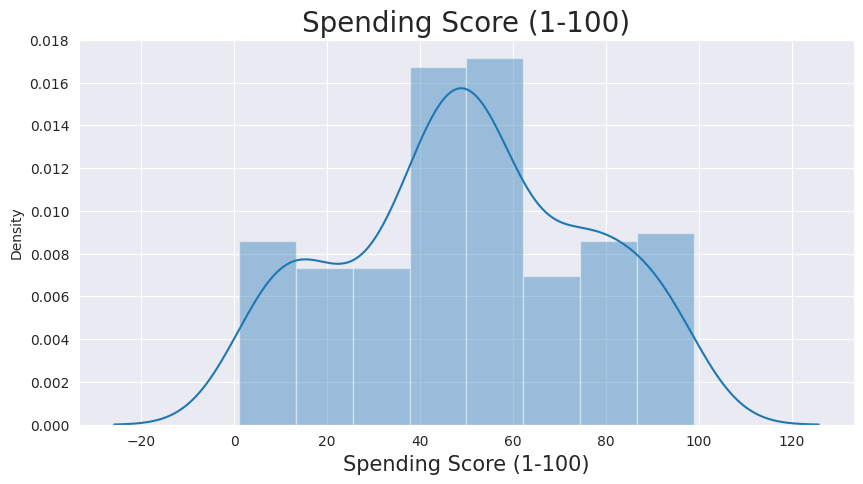

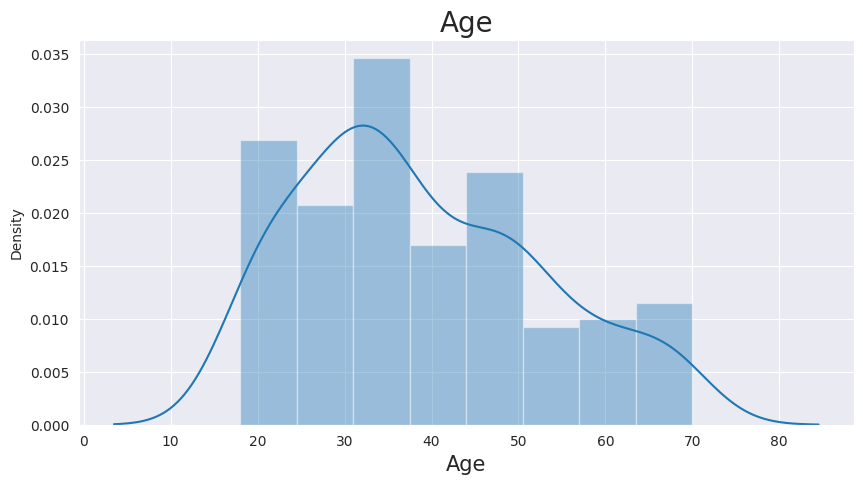

In [ ]:
# Distribution plot
for column in ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']:
    plt.figure(figsize=(10, 5))
    sns.distplot(df[column]);
    plt.xlabel(column, fontsize = 15)
    plt.ylabel('Density')
    plt.title(column, fontsize=20);


In [ ]:
# barplot of gender
gender = df.Gender.value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(gender.index, gender)
plt.title('Barplot of gender', fontsize=20)
plt.xlabel('gender', fontsize=15)
plt.ylabel('count', fontsize=15);

TypeError: ignored

<Figure size 1000x500 with 0 Axes>

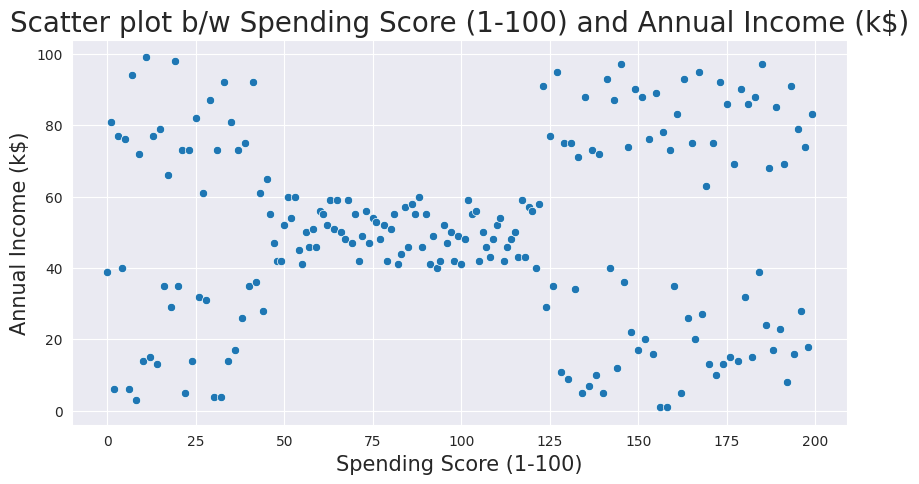

In [ ]:
''' scatter plot b/w Spending Score (1-100) and Annual Income (k$) '''
plt.figure(figsize=(10, 5))
sns.scatterplot(df['Spending Score (1-100)'])
plt.xlabel('Spending Score (1-100)', fontsize=15)
plt.ylabel('Annual Income (k$)', fontsize=15)
plt.title('Scatter plot b/w Spending Score (1-100) and Annual Income (k$)', fontsize=20);

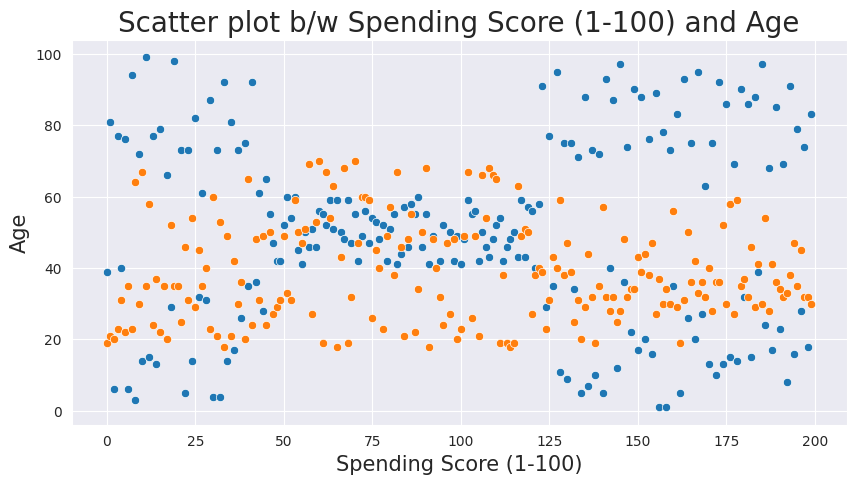

In [ ]:
# scatter plot b/w Age and Spending Score (1-100)
plt.figure(figsize = (10, 5))
sns.scatterplot(df['Spending Score (1-100)'])
sns.scatterplot(df['Age'])
plt.xlabel('Spending Score (1-100)', fontsize = 15)
plt.ylabel('Age', fontsize=15)
plt.title('Scatter plot b/w Spending Score (1-100) and Age', fontsize=20);

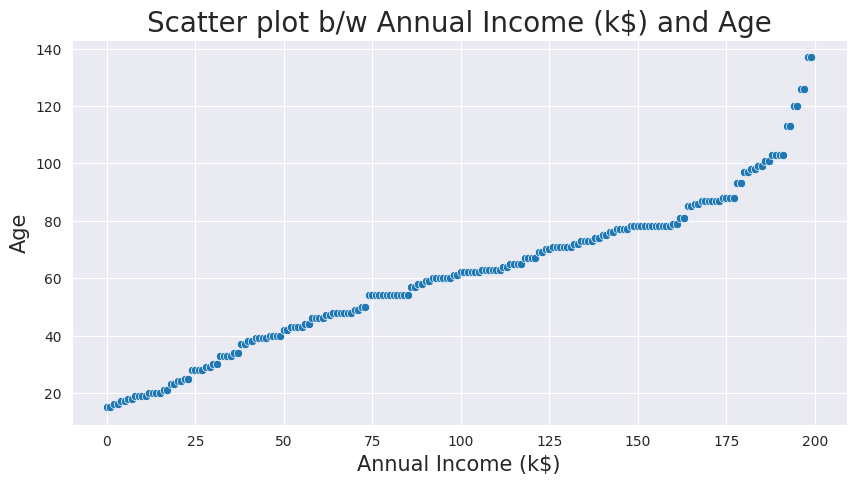

In [ ]:
# Scatter plot b/w Age and Annual Income (k$)
plt.figure(figsize = (10, 5))
sns.scatterplot(df['Annual Income (k$)'])
plt.xlabel('Annual Income (k$)', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.title('Scatter plot b/w Annual Income (k$) and Age', fontsize=20);

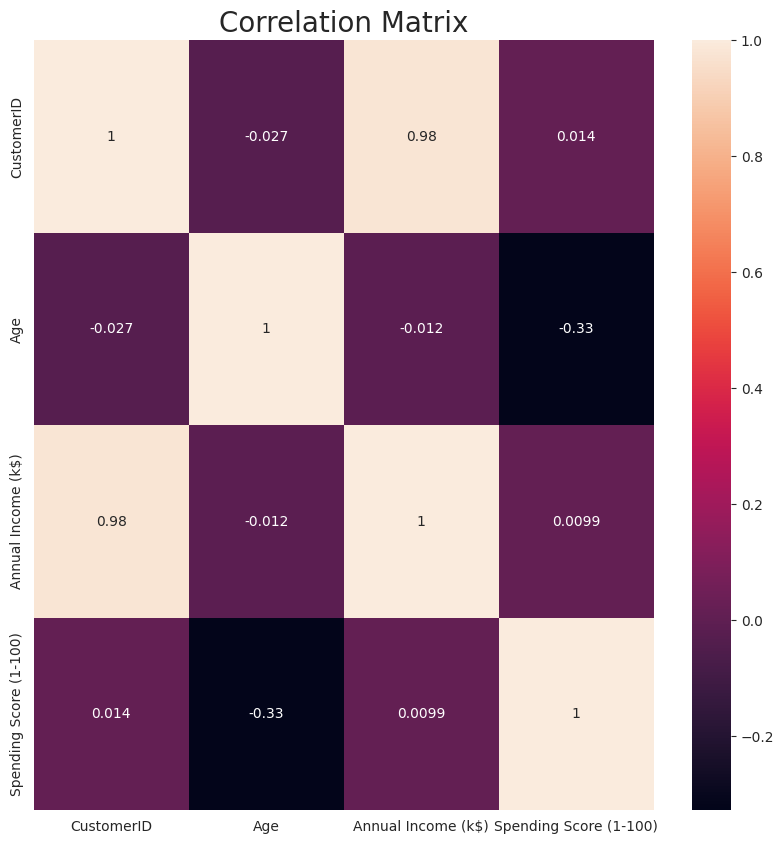

In [ ]:
# correlation matrix
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=20);

In [ ]:
# converting gender column into one-hot encoding
df['Gender'] = np.where(df.Gender == 'Male', 1,0)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


Text(0.5, 1.0, 'Correlation Matrix')

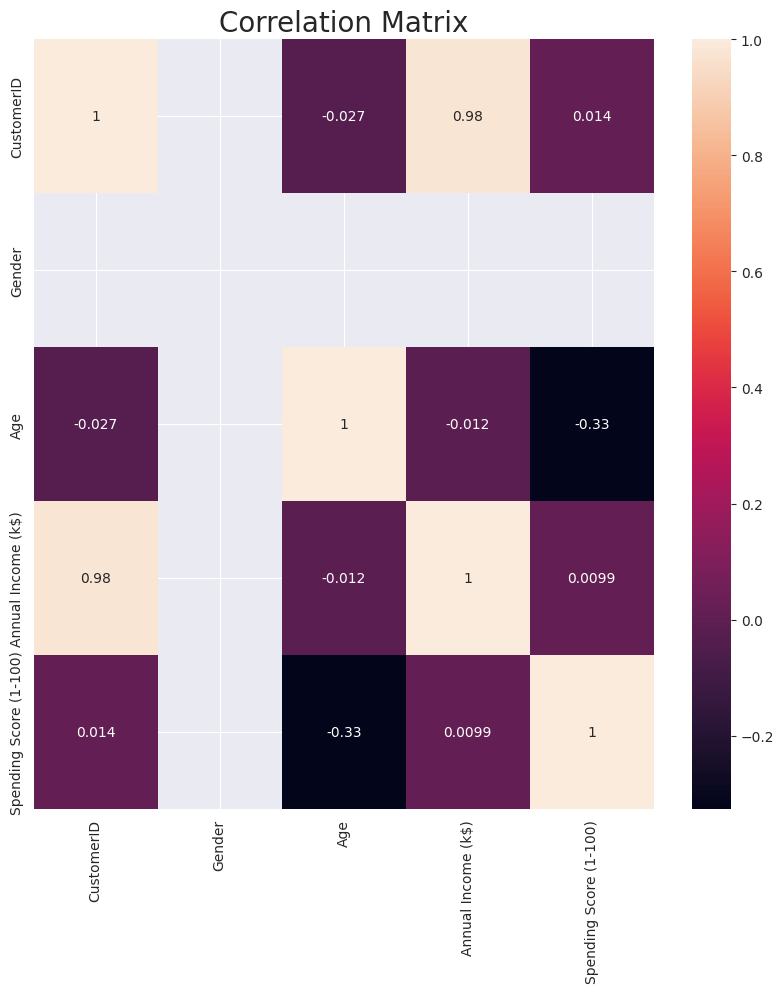

In [ ]:
# Correlation matrix
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix', fontsize = 20)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [ ]:
train = pd.read_csv('/content/mercedesbenz.csv')
print('Train shape:', train.shape)

Train shape: (4209, 378)


Too many features (columns) with not enough rows.

In [ ]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


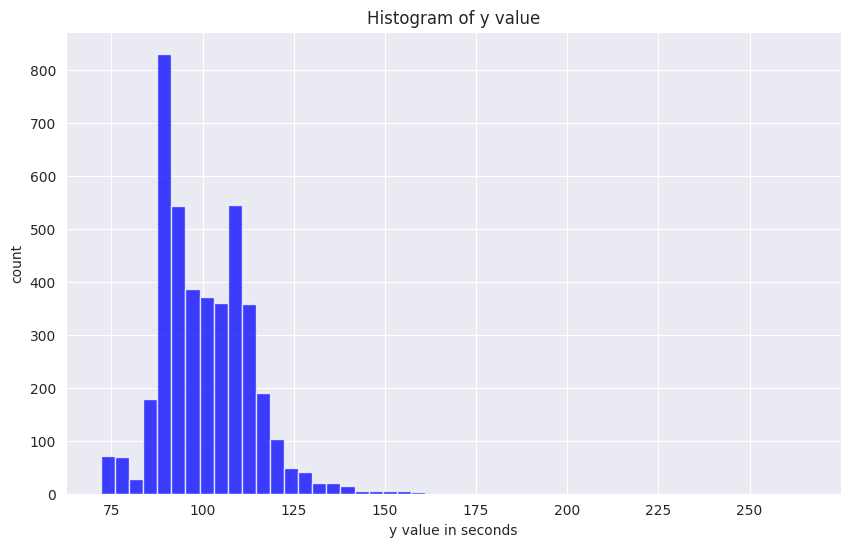

In [ ]:
# Target Feature - 'y' is the time (in seconds) that the car took to pass testing for each variable. Let's see its distribution.

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(train['y'], 50, facecolor='blue', alpha=0.75)
plt.xlabel('y value in seconds')
plt.ylabel('count')
plt.title('Histogram of y value')
plt.show()

In [ ]:
train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

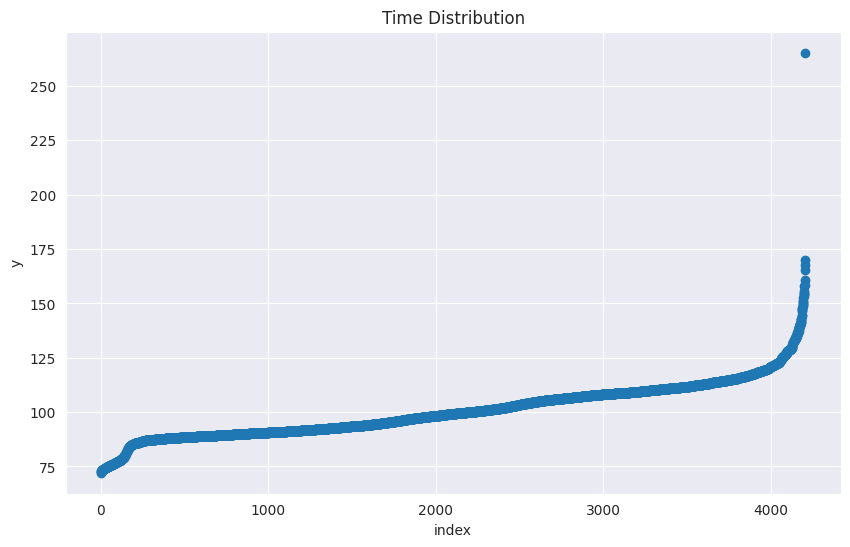

In [ ]:
plt.figure(figsize= (10,6))
plt.scatter(range(train.shape[0]), np.sort(train['y'].values))
plt.xlabel('index')
plt.ylabel('y')
plt.title("Time Distribution")
plt.show()

There is one outlier which was the max time at 265 seconds

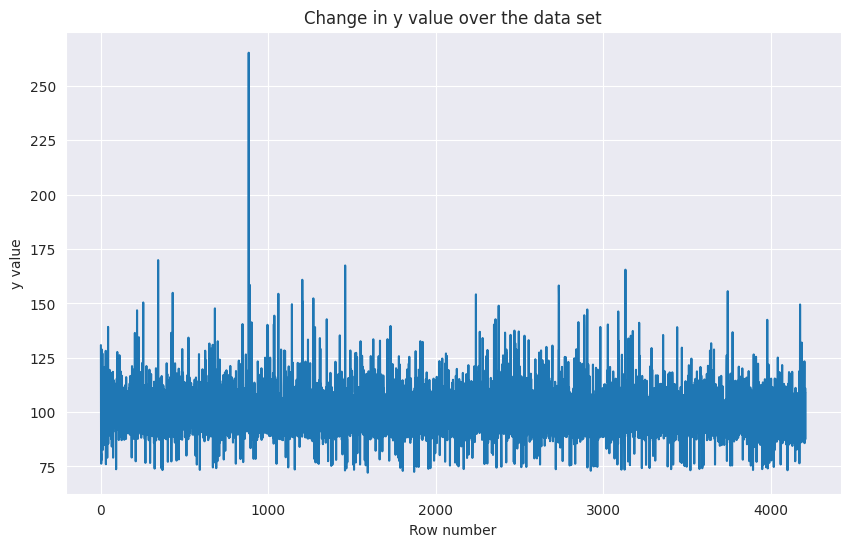

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(train['y'].values)
plt.xlabel('Row number')
plt.ylabel('y value')
plt.title('Change in y value over the data set')
plt.show()

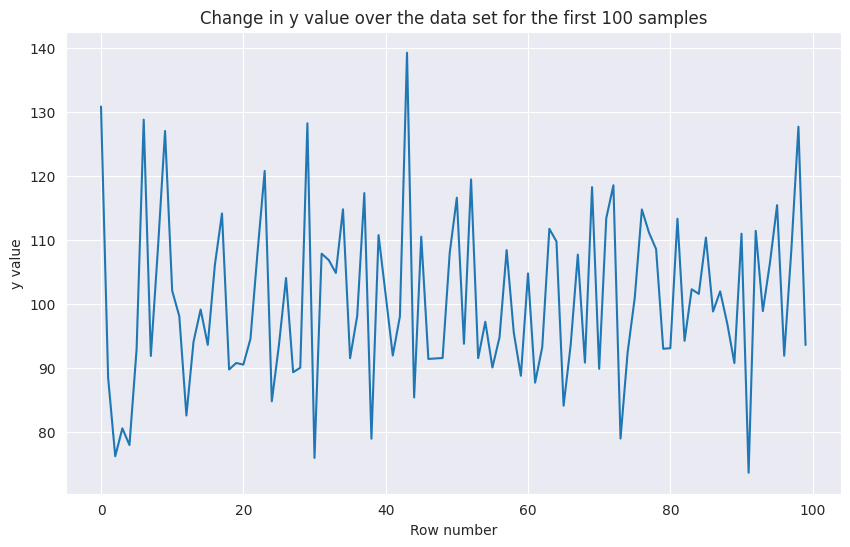

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train['y'][:100].values)
plt.xlabel('Row number')
plt.ylabel('y value')
plt.title('Change in y value over the data set for the first 100 samples')
plt.show()

In [ ]:
# Feature Exploration

cols = [c for c in train.columns if 'X' in c]
print('Number of features except ID and target feature: {}'.format(len(cols)))
print('Feature types :')
train[cols].dtypes.value_counts()

Number of features except ID and target feature: 376
Feature types :


int64     368
object      8
dtype: int64

Out of all features, we are given 8 categorical features and 368 integer features, What about the cardinality of our features? The following ideas and scripts were from XXX.

In [ ]:
counts = [[], [], []]
for c in cols:
    typ = train[c].dtypes
    uniq = len(train[c].unique())
    if uniq == 1:
        counts[0].append(c)
    elif uniq == 2 and typ == np.int64:
        counts[1].append(c)
    else:
        counts[2].append(c)
print('Constant features: {} Binary features: {} Categorical features: {}\n'.format(*[len(c) for c in counts]))
print('Constant features: ', counts[0])
print()
print('Categorical features: ', counts[2])

Constant features: 12 Binary features: 356 Categorical features: 8

Constant features:  ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']

Categorical features:  ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


Interestingly, we have 12 features which only have a single value (0) in them- these are pretty useless for supervised algorithms, and should probably be dropped(unless you want to use them for anomaly detection in case a different value appears in the test set)

The rest of our dataset is made up of many binary features, and 8 categorical features. Let's explore categorical features first.

In [ ]:
# Categorical Features
for cat in ['X0', 'X1', 'X2', 'X3', 'X4','X5','X6','X8']:
    print("Number of levels in category '{0}': \b{1:2}".format(cat, train[cat].nunique()))

Number of levels in category 'X0': 47
Number of levels in category 'X1': 27
Number of levels in category 'X2': 44
Number of levels in category 'X3':  7
Number of levels in category 'X4':  4
Number of levels in category 'X5': 29
Number of levels in category 'X6': 12
Number of levels in category 'X8': 25


Iam extremely interested in EDA, so let's go ahead to explore every categorical feature.

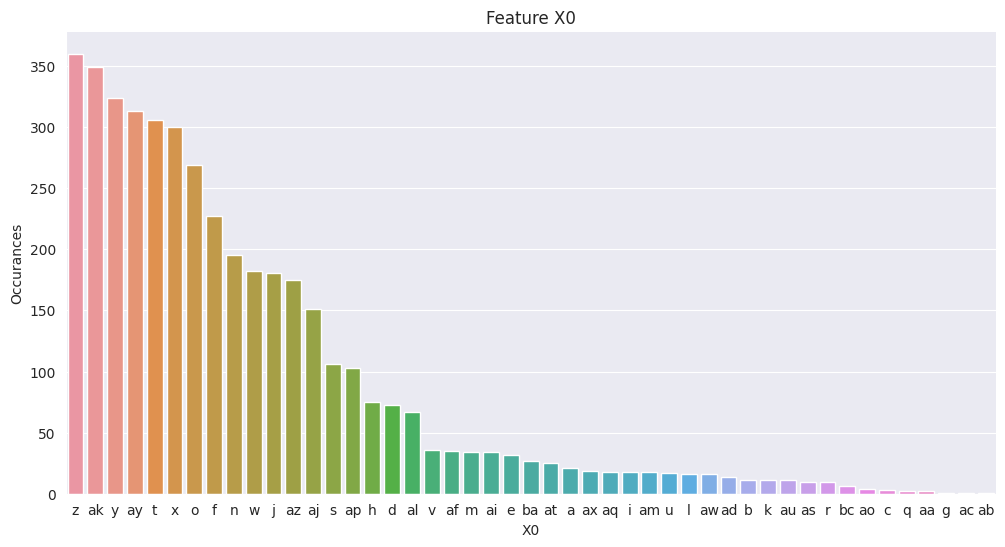

In [ ]:
# FEATURE X0

sor_X0 = train.groupby('X0').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize= (12, 6))
sns.countplot(x='X0', data = train, order = sor_X0)
plt.xlabel('X0')
plt.ylabel('Occurances')
plt.title('Feature X0')
sns.despine()

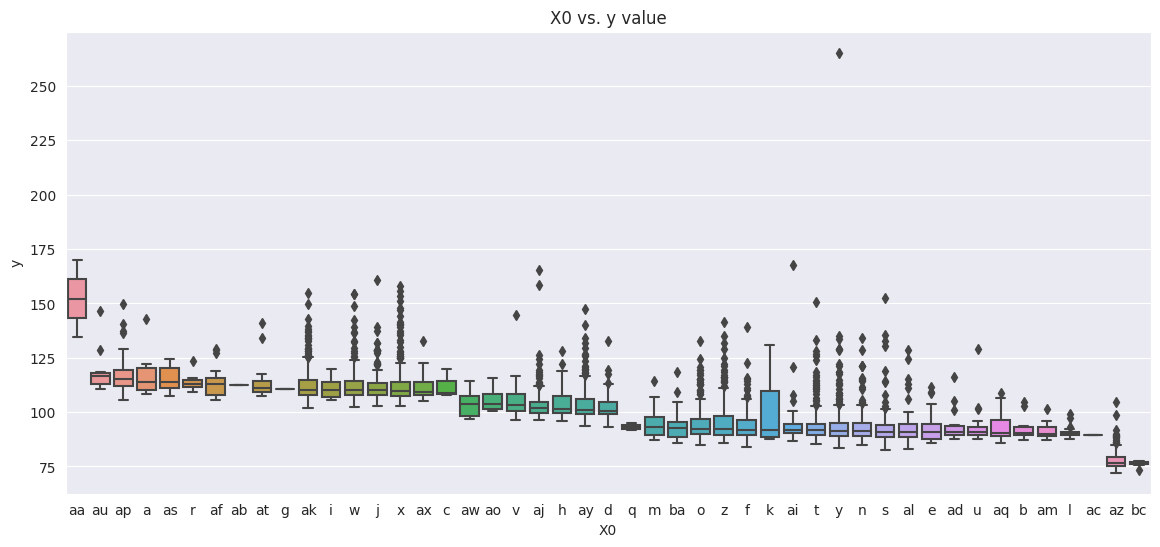

In [ ]:
# X0 vs target feature y

sort_y = train.groupby('X0')['y']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize= (14,6))
sns.boxplot(y='y', x='X0', data=train, order=sort_y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.title('X0 vs. y value')
plt.show()



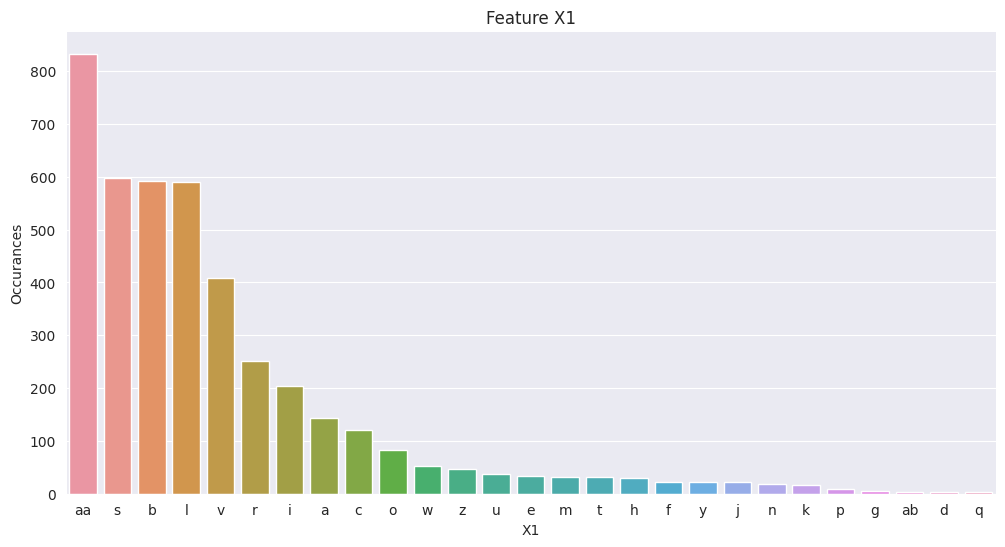

In [ ]:
# Feature X1

sort_X1 = train.groupby('X1').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(12,6))
sns.countplot(x='X1', data=train, order= sort_X1)
plt.xlabel('X1')
plt.ylabel('Occurances')
plt.title('Feature X1')
sns.despine()

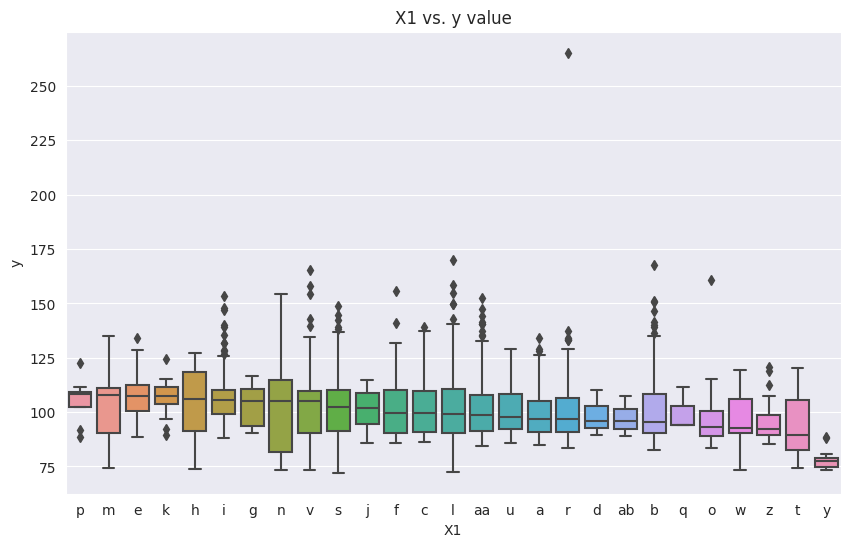

In [ ]:
# X1 vs target feature y

sort_y = train.groupby('X1')['y']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize = (10,6))
sns.boxplot(y='y', x='X1', data=train, order=sort_y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.title('X1 vs. y value')
plt.show()

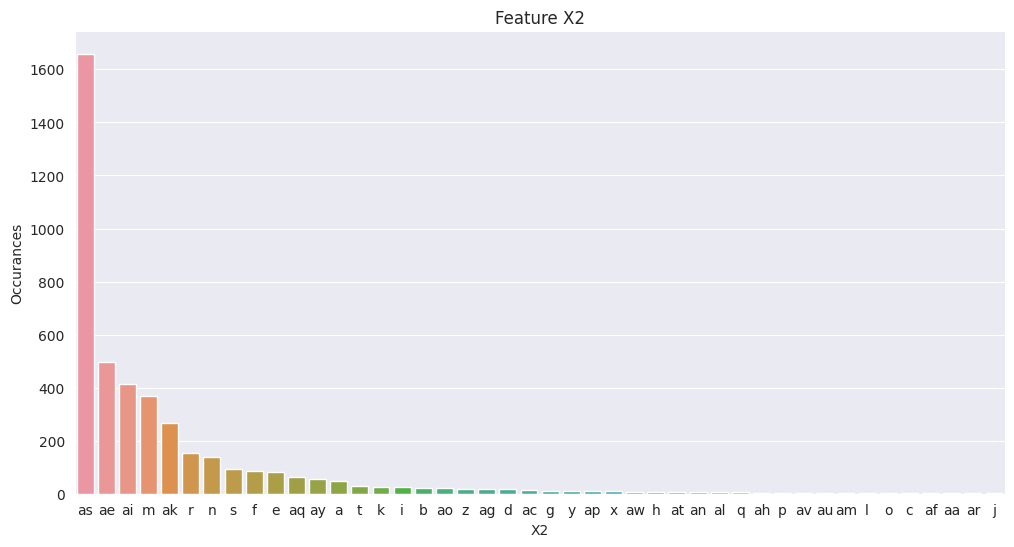

In [ ]:
# Feature X2

sort_X2 = train.groupby('X2').size()\
                      .sort_values(ascending=False)\
                      .index
plt.figure(figsize = (12,6))
sns.countplot(x='X2', data= train, order = sort_X2)
plt.xlabel('X2')
plt.ylabel('Occurances')
plt.title('Feature X2')
sns.despine()


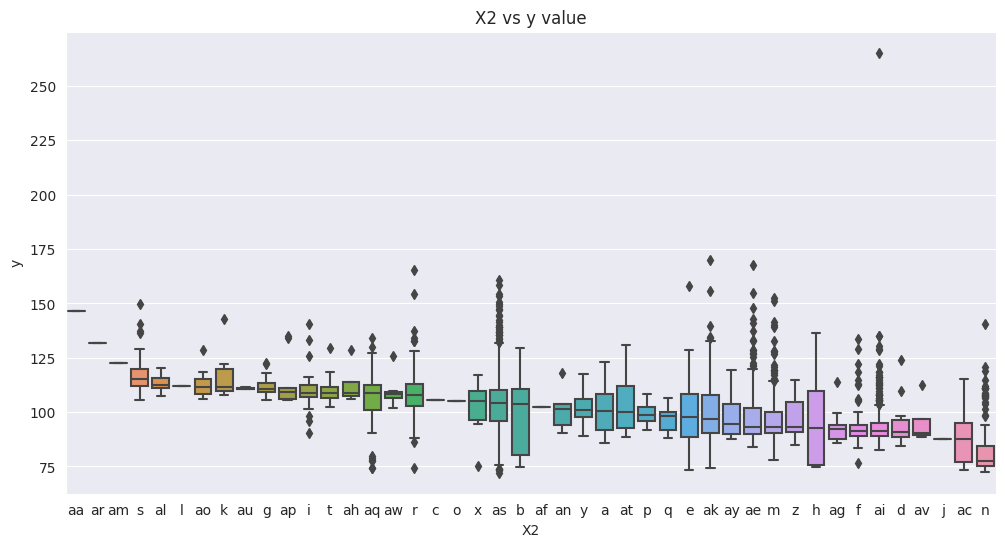

In [ ]:
# X2 vs target feature y

sort_y = train.groupby('X2')['y']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize = (12, 6))
sns.boxplot(y='y', x='X2', data=train, order=sort_y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.title('X2 vs y value')
plt.show()

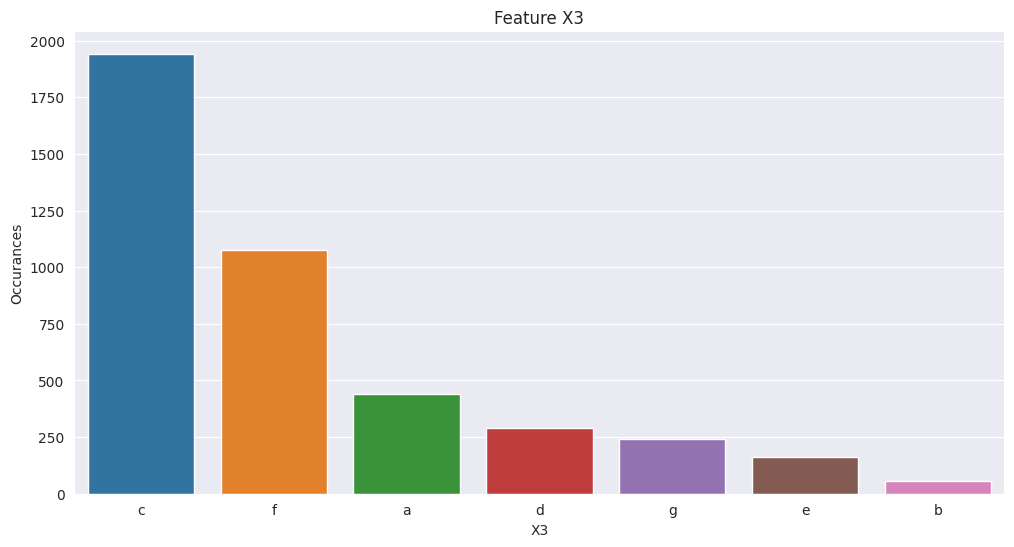

In [ ]:
# Feature X3

sort_X3 = train.groupby('X3').size()\
                      .sort_values(ascending=False)\
                      .index
plt.figure(figsize=(12,6))
sns.countplot(x='X3', data=train, order = sort_X3)
plt.xlabel('X3')
plt.ylabel('Occurances')
plt.title('Feature X3')
sns.despine()

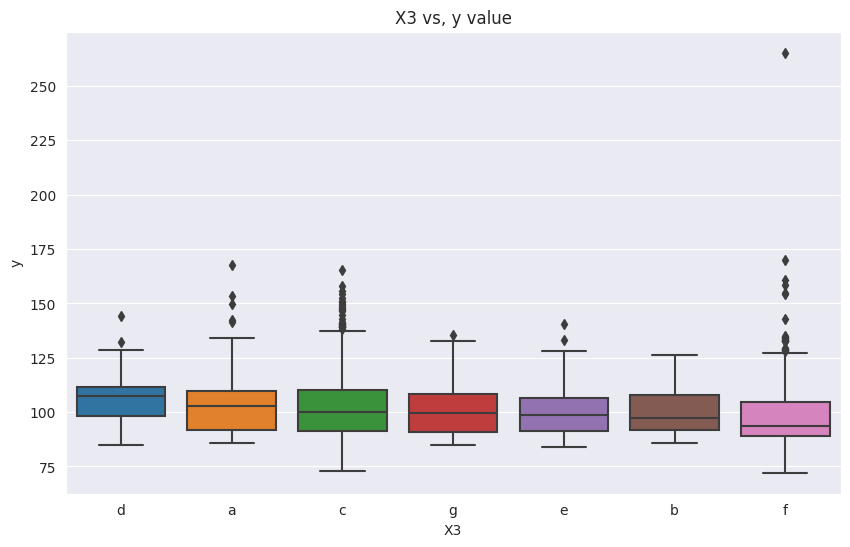

In [ ]:
# X3 vs target feature y
sort_y = train.groupby('X3')['y']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize = (10,6))
sns.boxplot(y='y', x='X3', data=train, order = sort_y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.title('X3 vs, y value')
plt.show()

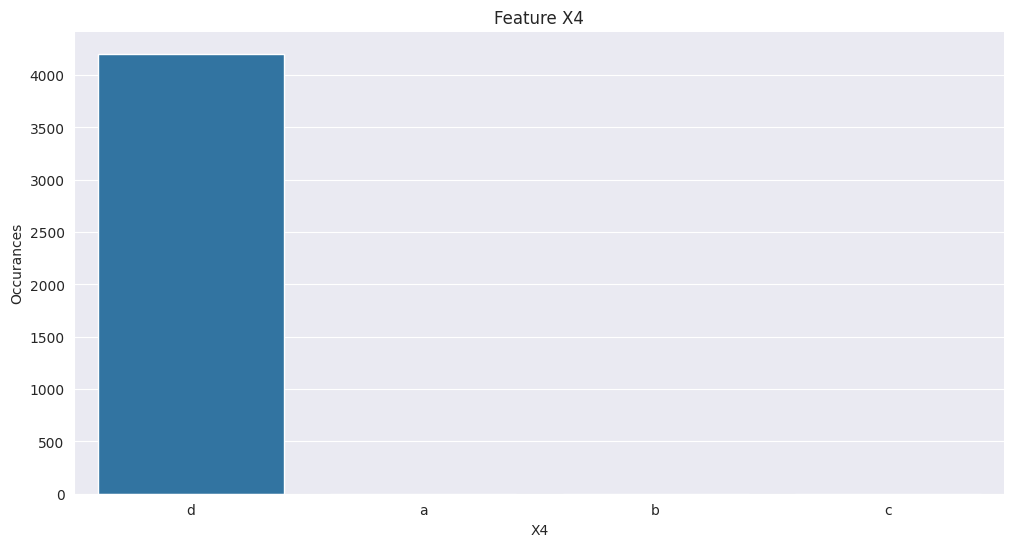

In [ ]:
# Feature X4

sort_X4 = train.groupby('X4').size()\
                      .sort_values(ascending=False)\
                      .index
plt.figure(figsize = (12,6))
sns.countplot(x='X4', data=train, order = sort_X4)
plt.xlabel('X4')
plt.ylabel('Occurances')
plt.title('Feature X4')
sns.despine()

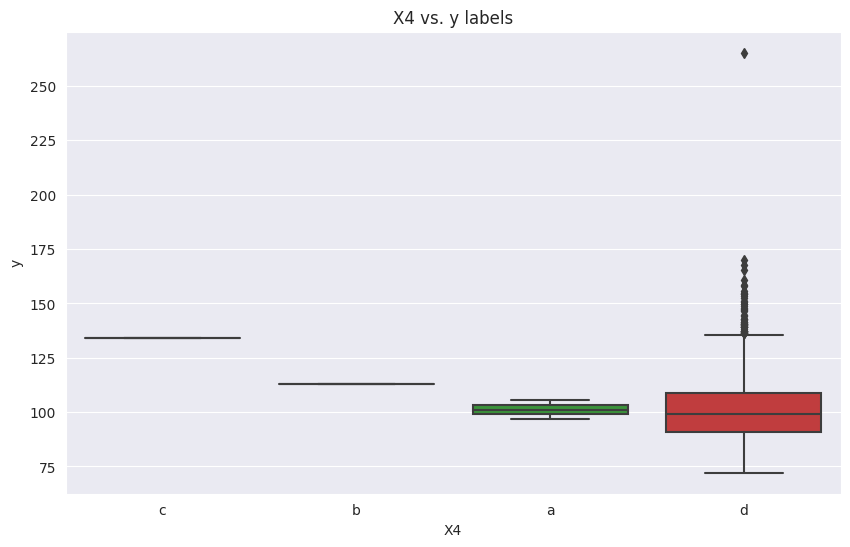

In [ ]:
# X4 vs target feature y

sort_y = train.groupby('X4')['y']\
                      .median()\
                      .sort_values(ascending=False)\
                      .index
plt.figure(figsize = (10, 6))
sns.boxplot(y='y', x='X4', data=train, order = sort_y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.title('X4 vs. y labels')
plt.show()

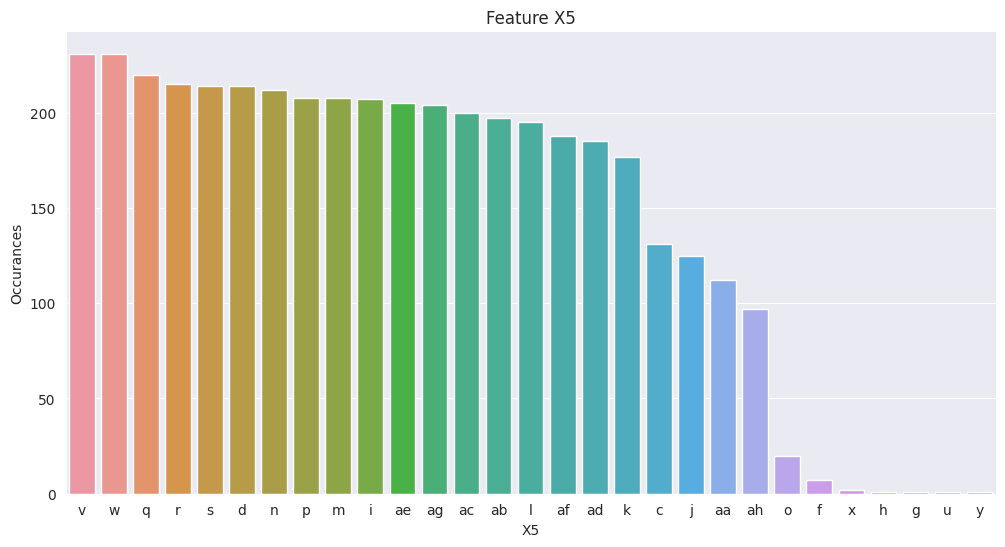

In [ ]:
# Feature X5

sort_X5 = train.groupby('X5').size()\
                      .sort_values(ascending=False)\
                      .index
plt.figure(figsize=(12, 6))
sns.countplot(x='X5', data=train, order = sort_X5)
plt.xlabel('X5')
plt.ylabel('Occurances')
plt.title('Feature X5')
sns.despine()

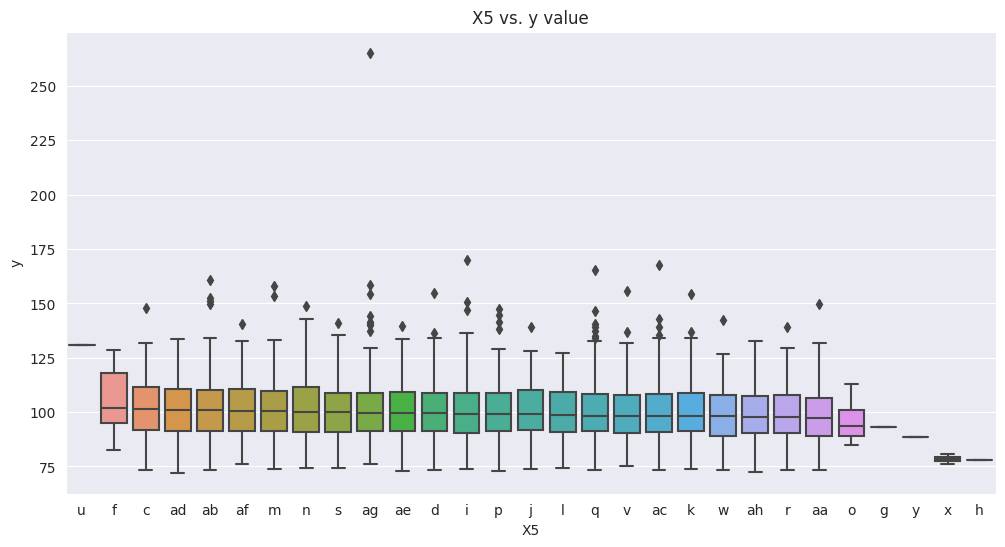

In [ ]:
# X5 vs target feature y

sort_y = train.groupby('X5')['y']\
                      .median()\
                      .sort_values(ascending=False)\
                      .index
plt.figure(figsize=(12,6))
sns.boxplot(y='y', x='X5', data=train, order=sort_y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.title('X5 vs. y value')
plt.show()

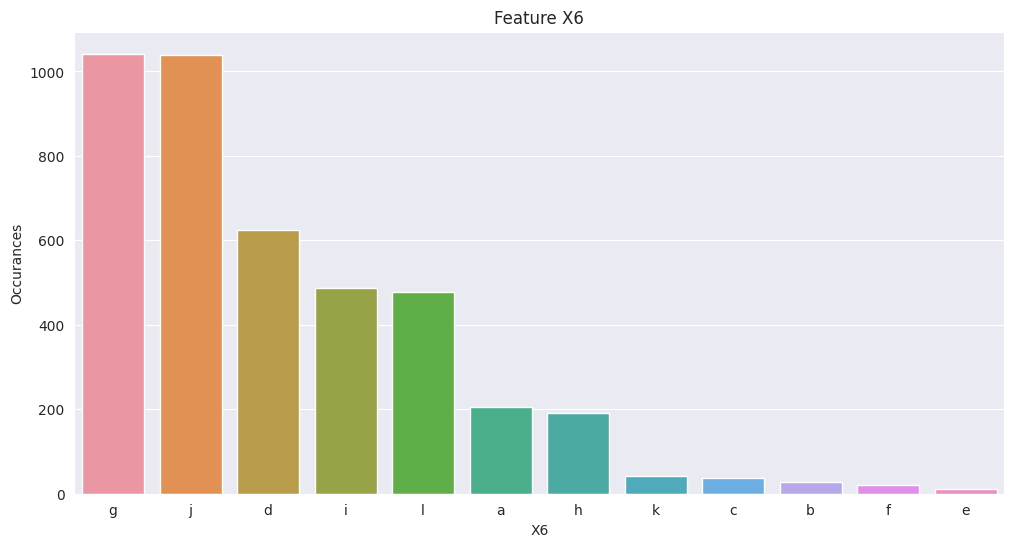

In [ ]:
# Feature X6

sort_X6 = train.groupby('X6').size()\
                      .sort_values(ascending=False)\
                      .index
plt.figure(figsize=(12,6))
sns.countplot(x='X6', data=train, order = sort_X6)
plt.xlabel('X6')
plt.ylabel('Occurances')
plt.title('Feature X6')
plt.show()

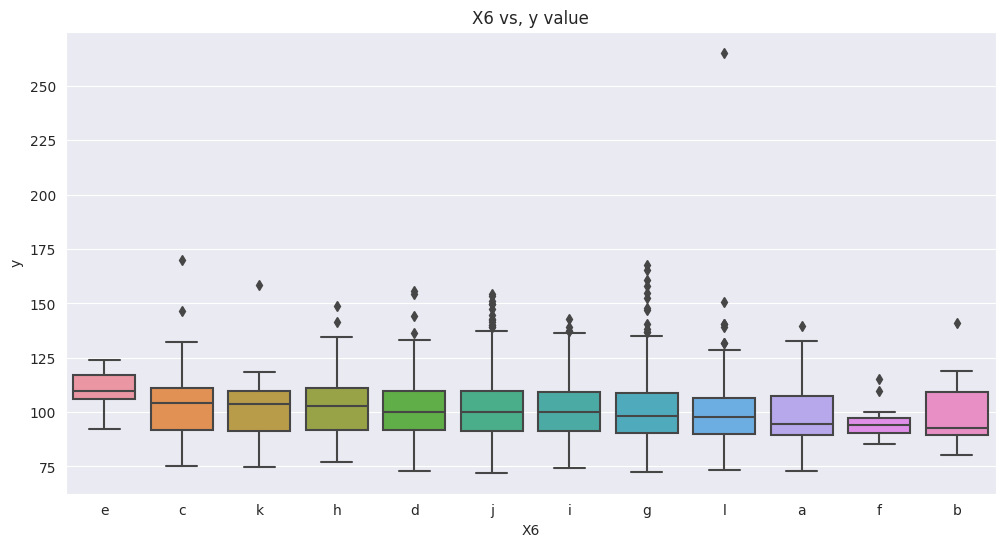

In [ ]:
# X6 vs target feature y

sort_y = train.groupby('X6')['y']\
                     .median()\
                     .sort_values(ascending=False)\
                     .index
plt.figure(figsize=(12,6))
sns.boxplot(y='y', x='X6', data=train, order = sort_y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.title('X6 vs, y value')
plt.show()

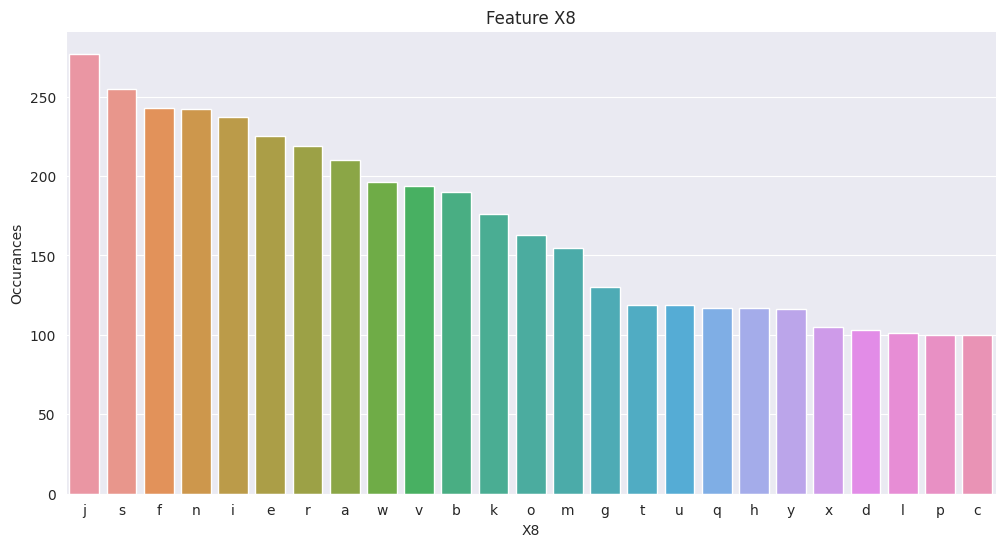

In [ ]:
# feature X8

sort_X8 = train.groupby('X8').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(12,6))
sns.countplot(x='X8', data=train, order = sort_X8)
plt.xlabel('X8')
plt.ylabel('Occurances')
plt.title('Feature X8')
sns.despine();



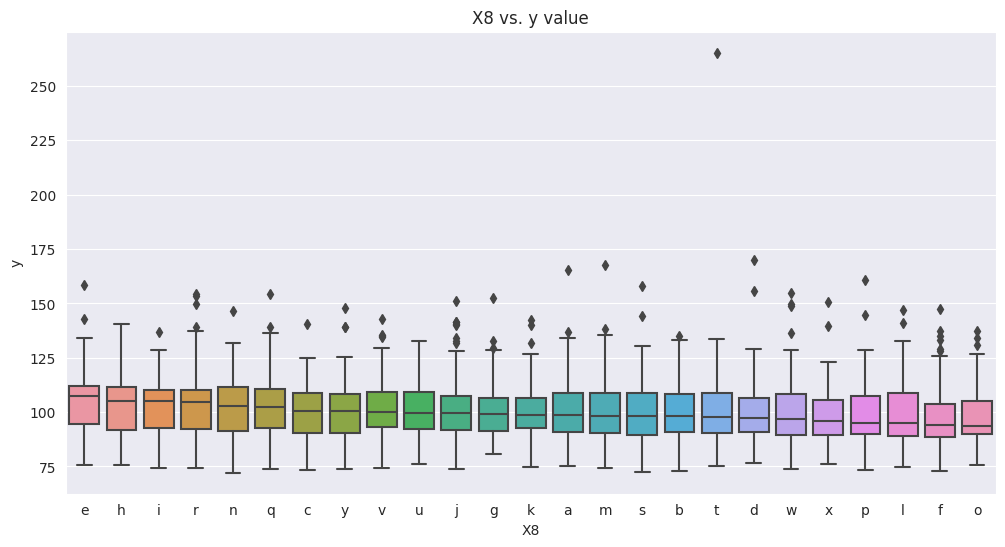

In [ ]:
# X8 vs. target feature y

sort_y = train.groupby('X8')['y']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize = (12, 6))
sns.boxplot(y='y', x='X8', data=train, order=sort_y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.title('X8 vs. y value')
plt.show();

Some categorical features have effects on the "y" and "X0" seems to have the highest effect

For the categorical features, we encode the levels as digits using Scikit-learn MultiLabelBinarizer and treat them as new features.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

X0_trans = mlb.fit_transform([{str(val)}])